In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import csv
import json
import itertools
import collections
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import pairwise_distances
from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
import logging
logging.basicConfig(level=logging.INFO)

In [4]:
screen_names = pd.read_csv('screen_names.csv', index_col='screen_name')
screen_names = screen_names[screen_names.sum(axis=1) > 0]

In [5]:
sn = screen_names[
    (screen_names.index.str.startswith('@') == True)
    & (screen_names.index.str.startswith('@@') == False)
]

In [6]:
sn = screen_names

In [7]:
mds = manifold.MDS(dissimilarity='precomputed', n_jobs=2)

sn_xy = pd.DataFrame(
    mds.fit_transform(
        pairwise_distances(sn, metric='cosine')
    ),
    index=sn.index,
)


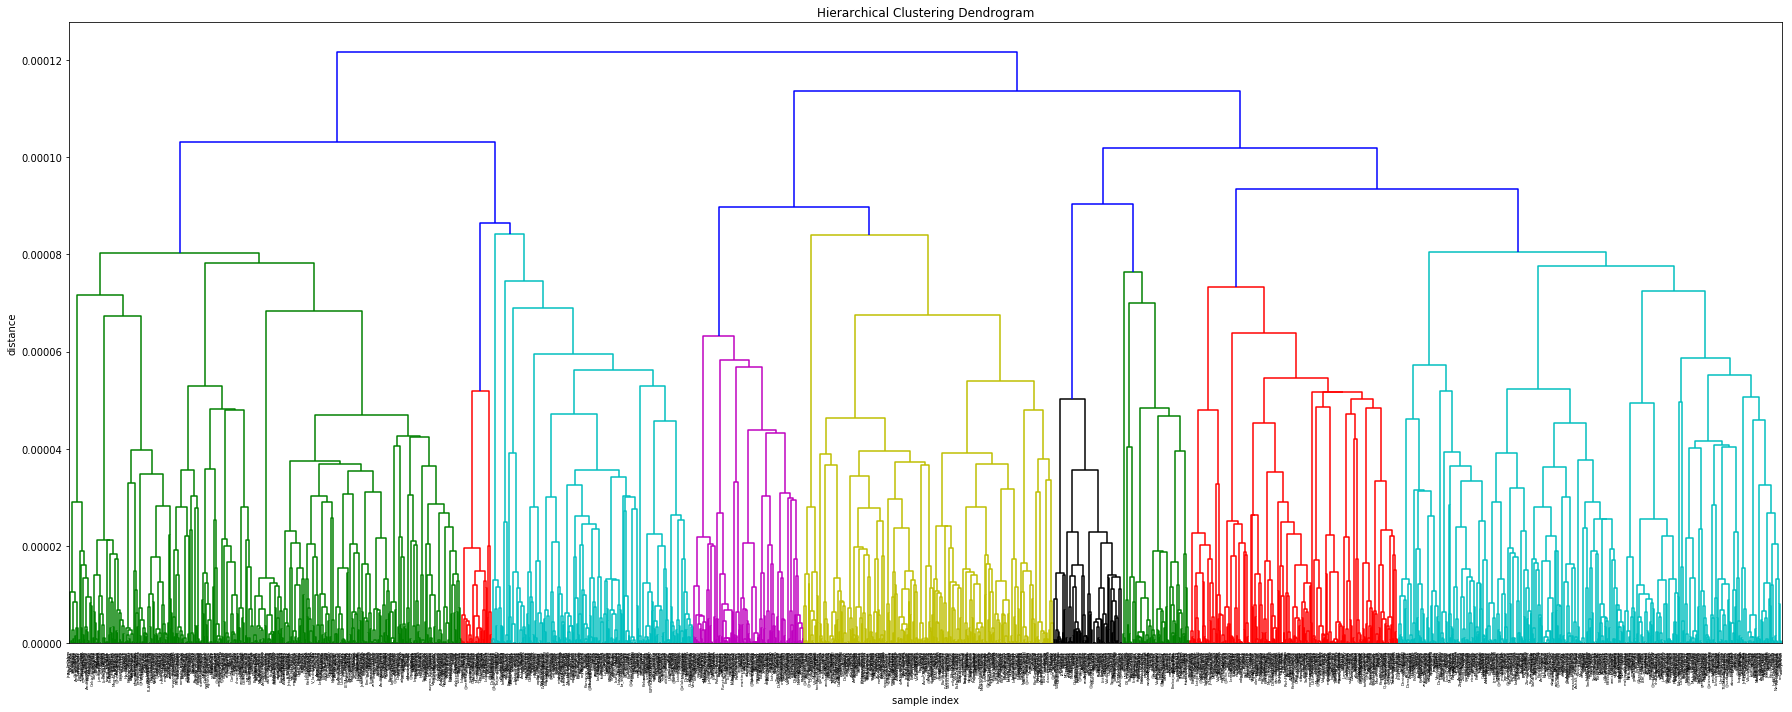

In [8]:
Z = linkage(sn_xy, metric='cosine')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')

plt.xlabel('sample index')
plt.ylabel('distance')

R = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=4.,  # font size for the x axis labels
    labels=sn.index,
)

plt.tight_layout()
plt.savefig('screen_names_clusters-without-groups-mdn.pdf')

In [9]:
clusters = fcluster(Z, 10)

In [12]:
X.index.str.startswith('@')

array([False, False, False, ...,  True, False, False])

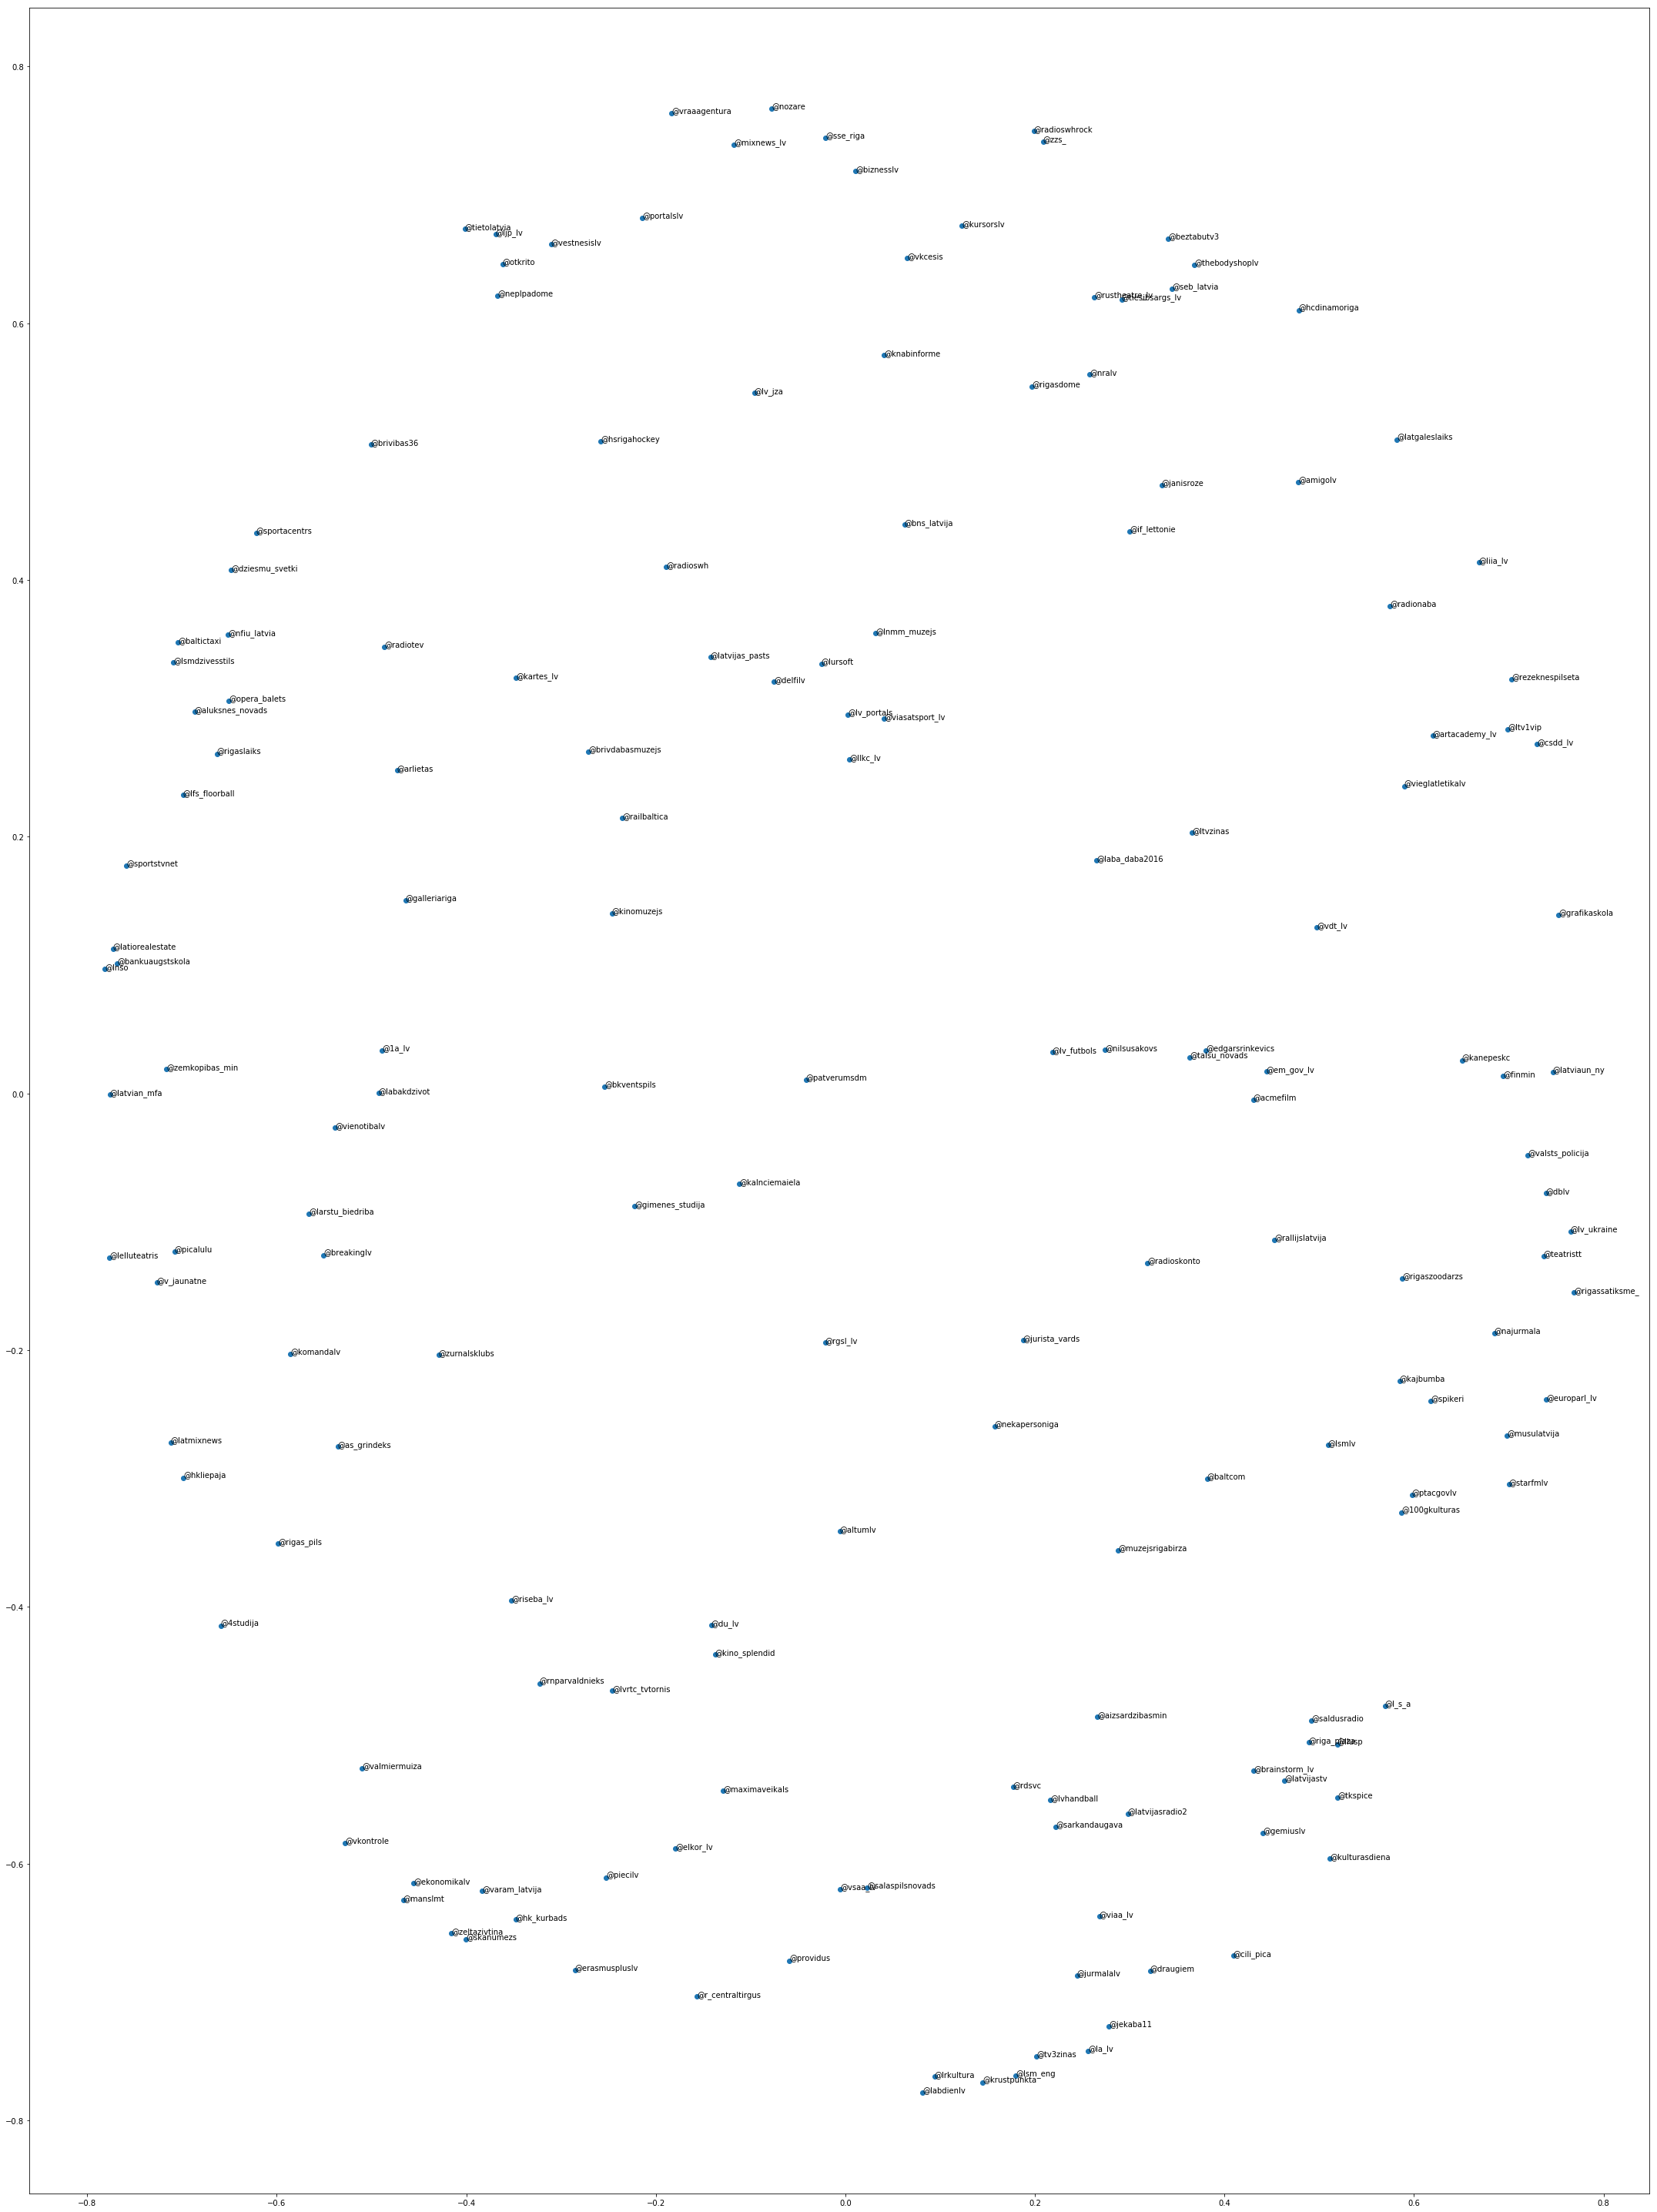

In [18]:
X = sn_xy.loc[R['ivl']]

X = X.loc[X.index.str.startswith('@')]

plt.figure(figsize=(30, 40))
plt.scatter(X[0], X[1])
texts = X.apply(lambda r: plt.text(r[0], r[1], r.name), axis=1)

#plt.show()
plt.tight_layout()
plt.savefig('screen_names.pdf')